### **Comprehensive examination**

J Alejandra García M.

Question 2.

Consider a tank with pressurized air with $P_0 = 700,\text{kPa}$, $T_0 = 20 ,^\circ\text{C}$, $V = 1.5\,\text{m}^3$. Throat area in the converging section of the nozzle of $0.65\,\text{cm}^2$, exhausting to 1 atm environment. Determine the net time taken for pressure in the tank to decrease to $500\,\text{kPa}$. You can assume calorically perfect and ideal gas while stagnation temperature is constant (so small heat transfer to tank in time operation)



In [45]:
import numpy as np

def Celsius_to_Kelvin(T):
    return T + 273.15

P0    = 700e3                       # Initial pressure in Pa 
P     = 500e3                       # Pressure at time t in Pa
P_atm = 101.32                      # Atmospheric pressure in Pa
A     = 6.5e-5                      # Throat area in m^2
R     = 287                         # Gas constant J/(kg.K)
T0    = 20                          # Temperature in Celsius
T0    =  Celsius_to_Kelvin(T0)      # Temperature in Kelvin
V     = 1.5                         # Volume in m^3
k     = 1.4                         # Constant
Ma    = 1                           # Mach number
A     = 0.000065                    # Area of the converging nozzle m^2


P_atm/P0                            #Ratio of P_atm/Po

0.00014474285714285713

he expression for the maximum mass flow rate $\dot{m}_{\text{max}}$ is
\begin{equation}
    \dot{m}_{\text{max}} =  A^* P_0 \sqrt{\frac{k}{R T_0}} \left(\frac{2}{k+1} \right)^{(k+1)/2(k-1)}
\end{equation}

In [46]:
def max_mass_flow_rate(P0,A, R, T0, k):
    term = np.sqrt((k / (R * T0))) * ((2 / (k + 1)) ** ((k + 1) / (2 * (k - 1))))
    return A *P0*term

max_mass_flow_rate(1,A, R, T0, k) #*P0

1.534432324143544e-07

In [47]:
max_mass_flow_rate(1,A, R, T0, k) 

1.534432324143544e-07

In [48]:
((T0*R)/V)*max_mass_flow_rate(1,A, R, T0, k) 

0.008606533725407275

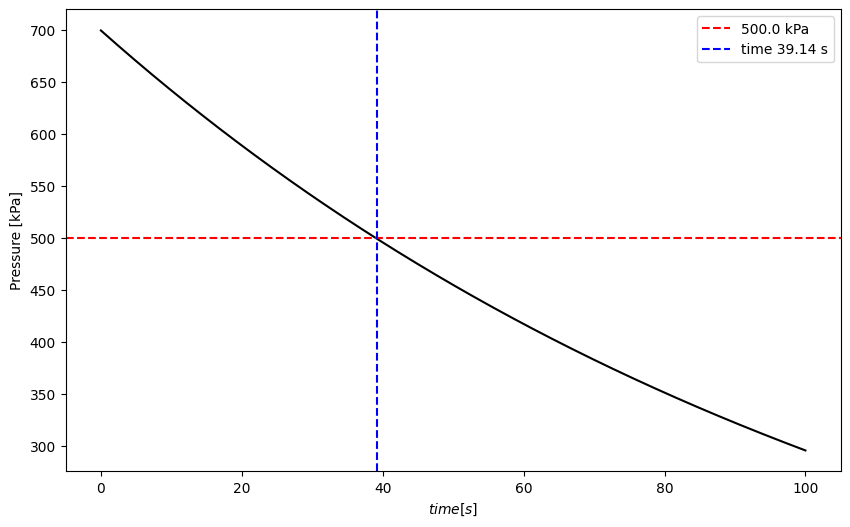

The time taken to reach 500 kPa is approximately 39.14 seconds.


In [88]:
decay_rate = 0.008606 
P          = 500000
time       = np.linspace(0, 100, 1000)
C          = P0/1e3
P0_t       = C * np.exp(-decay_rate * time)
time_at_P  = time[np.argmin(np.abs(P0_t - (P/1e3)))]


plt.figure(figsize=(10, 6))
plt.plot(time, P0_t,color='black')
plt.axhline(y=P/1e3, color='r', linestyle='--', label=f'{P/1e3} kPa')
plt.axvline(x=time_at_P, color='b', linestyle='--', label=f'time {time_at_P:.2f} s')
plt.xlabel('$time [s]$')
plt.ylabel('Pressure [kPa]')
plt.legend()
plt.savefig('pressure_decay_plot.png', dpi=300)  
plt.show()



print(f"The time taken to reach 500 kPa is approximately {time_at_P:.2f} seconds.")
